# Practice 9
In this exercise, you will practice prediction, including regression and classification, using the [scikit-learn library](https://scikit-learn.org/stable/index.html). Note that scikit-learn is included in the Anaconda distribution, so you should not need to install anything new to use it.

Show your work (code or otherwise) and/or briefly explain your answers. In general you will not receive full credit for numeric answers with no accompanying work or justification (math, code, explanation). For numeric answers, we will accept answers that are very slightly off due to rounding.

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before submitting your .ipynb file (the notebook file) on gradescope. **Be especially careful** as there will be at least some variables that are redefined at various points in the notebook (e.g., `train_data`), so executing cells out of order may result in incorrect output.

In [1]:
# Run this code cell to import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

### Question 1
Below we import the `penguins` dataset containing information from a study of several hundred penguins including three different species on multiple islands. We preview the first few rows.

In [2]:
# Run but do not modify this code
# Only 11 penguins out of over 300 are missing any data;
# we simply drop those here
penguins = sns.load_dataset("penguins").dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We are interested in exploring the relationship between bills and flippers. In particular, in this question we will ask whether we can model/predict `flipper_length_mm` as a function of `bill_length_mm` and `bill_depth_mm`. To start, we draw the scatter plots of `flipper_length_mm` on the vertical y-axis versus `bill_length_mm` and `bill_depth_mm` on the horizontal x-axis of the two plots respectively.

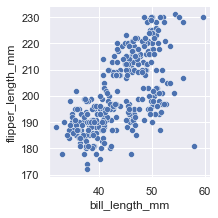

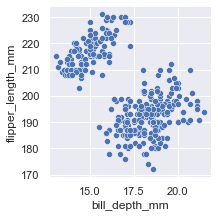

In [3]:
# Run but do not modify this code
sns.relplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", height=3)
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3)

There appears to be some sort of relationship between the dimensions of a penguin's bill and its flippers. Use scikit-learn to perform linear regression to model `flipper_length_mm` as a function of `bill_length_mm` and `bill_depth_mm`. Once you have fit the model, obtain the model predictions and compare them to the real `flipper_length_mm`. Compute both the MSE (mean squared error) and the r^2 score (the square of Pearson's correlation coefficient). Report the MSE and r^2 score.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LinearRegression model, i.e., you do not need to pass any parameters to the constructor.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Write your code for question 1 here

datapeng=penguins[['bill_length_mm','bill_depth_mm']].values
targetpeng=penguins['flipper_length_mm'].values
linear_model_penguins= LinearRegression()
linear_model_penguins.fit(X=datapeng,y=targetpeng)
penguins['predicted_flipper_length_mm']=linear_model_penguins.predict(datapeng)

print(mean_squared_error(targetpeng, penguins['predicted_flipper_length_mm'].values))
print(r2_score(targetpeng, penguins['predicted_flipper_length_mm'].values))



74.37425599612503
0.6202523002022253


### Answer 1
Write your answer here if not printed above.

### Question 2
One way to improve the performance of our regression model for the prediction task described in question 1 is to include the `species` and `sex` features. That is, we now want to model/predict `flipper_length_mm` as a function of `bill_length_mm`, `bill_depth_mm`, `species`, and `sex`. However, the `species` and `sex` features are both categorical. Compute a one hot encoding (using `OneHotEncoder` imported for you below) of the `species` and `sex` data, combine that with the numerical `bill_length_mm` and `bill_depth_mm` data, and fit a linear regression model on all of the inputs. 

As in question 1, once you have fit the model, obtain the model predictions and compare them to the real `flipper_length_mm`. Compute both the MSE (mean squared error) and the r^2 score (the square of Pearson's correlation coefficient). Report the MSE and r^2 score.

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Write your code for question 2 here
better_linear_model_penguins= LinearRegression()

betterdata=np.append(OneHotEncoder().fit_transform(penguins[['species','sex']]).toarray(),
                     penguins[['bill_length_mm','bill_depth_mm']], axis=1)

better_linear_model_penguins.fit(X=betterdata,y=targetpeng)

penguins['predicted_flipper_length_mm']=better_linear_model_penguins.predict(betterdata)

print(mean_squared_error(targetpeng, penguins['predicted_flipper_length_mm'].values))
print(r2_score(targetpeng, penguins['predicted_flipper_length_mm'].values))



29.286855360077247
0.8504641719323027


### Answer 2
Write your answer here if not printed above.

### Question 3
In question 2 we showed that incorporating `species` and `sex` significantly improved the quality of our predictive model of `flipper_length_mm` as opposed to only predicting based on `bill_length_mm` and `bill_depth_mm`. One curious feature: in question 1, the fitted model has a negative coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have shorter flippers), but in question 2 the fitted model has a positive coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have longer flippers).

Using Seaborn (imported above as `sns`), create two visualizations. For the first, draw a scatter plot of `bill_depth_mm` on the horizontal x-axis and `flipper_length_mm` on the vertical y-axis and color the points by their `sex`. In the second, create the same scatter plot but color the points by their `species`. Referring to your visualizations to justify your answer, explain which of `sex` or `species` is likely to have caused the model coefficient for `bill_depth_mm` to change from negative to positive between question 1 and question 2.

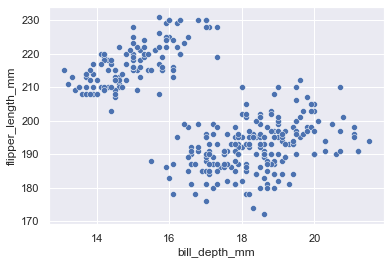

In [6]:
sns.scatterplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm")

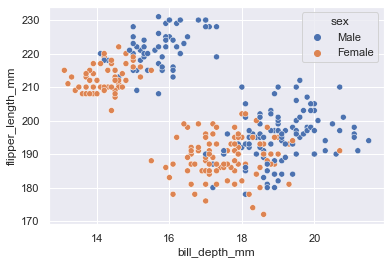

In [7]:
# Write your code for question 3 here
sns.scatterplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue='sex')

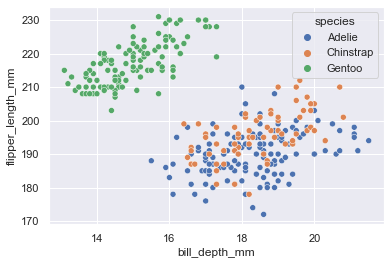

In [8]:
sns.scatterplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue='species')


### Answer 3
It's most likely species that caused the coefficient to change because from the graph for sex we can see the negative trend for both sexes is consistent with the original model. But, when we look at trends for bill depth and flipper length within the three species, we see that there's a positive relationship within each of the three, and they're just in different ranges of values.

### Question 4
Below we import the `cancer` dataset that contains information from a study of several hundred tumors/masses, some of which are `benign` (not cancerous), and some of which are `malignant` (cancerous). Use logistic regression to model/predict whether a `tumor` is benign or malignant using all of the other features in the dataset. Once you have fit a model, make predictions for all of the data and then compute and report the `accuracy_score` of your predictions. Also plot the confusion matrix for your predictions. How many false positives are there (treating `malignant` as the positive class)? How many false negatives (treating `benign` as the negative class)?.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LogisticRegression model, i.e., you do not need to pass any parameters to the constructor.

In [9]:
# Run but do not modify this code
cancer = pd.read_csv("cancer.csv")
cancer.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,tumor
0,5,1,1,1,2,3,1,1,benign
1,5,4,4,5,7,3,2,1,benign
2,3,1,1,1,2,3,1,1,benign
3,6,8,8,1,3,3,7,1,benign
4,4,1,1,3,2,3,1,1,benign


0.9613733905579399


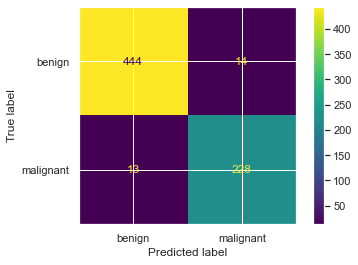

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt # just to format confusion matrix

# Write your code for question 4 here
cancerdata=cancer[['clump_thickness',
                   'uniformity_cell_size','uniformity_cell_shape',
                   'marginal_adhesion','epithelial_cell_size',
                   'bland_chromatin','normal_nucleoli','mitoses']]
tumortype=cancer['tumor']
logistic_model= LogisticRegression()
logistic_model.fit(X=cancerdata,y=tumortype)
cancer['predecitedtumor']=logistic_model.predict(cancerdata)

print(accuracy_score(tumortype,cancer['predecitedtumor']))
plot_confusion_matrix(logistic_model,cancerdata,tumortype)
# plt.grid(False)
# optionally uncomment the above line if your confusion matrix has 
# distracting white lines; it should remove them. Must come after
# your call to plot_confusion_matrix.

### Answer 4
The classification accuracy is about 0.96. The confusion matrix shows that there are 14 false positives and 13 false negatives.

### Question 5
A false negative is arguably a much more dangerous mistake for this prediction task than a false positive. Fortunately, it is easy to tune logistic regression to prioritize avoiding false negatives by changing the threshold for which we predict the positive versus the negative class. Instead of calling `.predict()` on your logistic regression model from question 4, use [`.predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba) to get the probabilities estimated by the regression model that each tumor is either `benign` or `malignant`. Use this to create a new list/array of predictions by predicting `malignant` when the probability is at least 0.1 and `benign` otherwise. 

Using your new predictions, again compute and report the `accuracy_score` of your predictions. Also plot the confusion matrix for your predictions. Note that you will not be able to use `plot_confusion_matrix` as above because it requires a `sklearn` estimator and we are manually changing the predictions. You can use `confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)) to simply pass your predictions and the true values and get the confusion matrix as a 2d array to print; it displays the values in the same orientation as the confusion matrix plot from the previous question. How many false positives are there (treating `malignant` as the positve class)? How many false negatives (treating `benign` as the negative class)?.

In [11]:
from sklearn.metrics import confusion_matrix

cancerproba=logistic_model.predict_proba(cancerdata)
malignant=cancerproba[:,1]>=.1
newpredictions=[]
for i in range(len(cancerproba)):
    if malignant[i]:
        newpredictions.append('malignant')
    else:
        newpredictions.append('benign')
        
print(accuracy_score(tumortype,newpredictions))
confusion_matrix(tumortype,newpredictions)

# Write your code for question 5 here


0.9570815450643777


array([[430,  28],
       [  2, 239]])

### Answer 5
The classification accuracy isabout 0.957 (almost the same as before). However, we now make 28 false positives and just 2 false negatives.

### Question 6
In the previous two questions we were predicting on just two classes and the input data were numerical. In this question, we work with the `20newsgroups` dataset. It contains internet posts in raw text classified into one of 20 types. Below we import the dataset and print the names of the 20 classes of posts. `data` contains the text of the posts themselves and `target` contains numbers corresponding to the classes of the posts. For context we preview part of the first post in `data`, which is about sports.

In [12]:
# Run but do not modify this code

from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")
print(news.target_names, "\n")
data = news["data"]
target = news["target"]
print(data[0][192:600])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'] 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular sea


Now we use the `train_test_split` function from scikit-learn to hold out 30% of the data for the testing, and keep the remaining 70% of the data for training / fitting a model.

In [13]:
# Run but do not modify this code 

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)

Vectorize the text data using the scikit-learn `CountVectorizer` (imported below), fit a Naive Bayes model on the training data (use `MultinomialNB` from scikit-learn, also imported below), and predict the class of the test data. You may find it convenient to do so using a scikit-learn pipeline, though it is not required. You can use the default parameters for both the `CountVectorizer` and `MultinomialNB`. When you have fit your model, compute and report the `accuracy_score` of your predictions for the test data.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

MNB = make_pipeline(CountVectorizer(),MultinomialNB())
MNB.fit(train_data, train_target)
predictcategory=MNB.predict(test_data)
print(accuracy_score(test_target,predictcategory))

# Write your code for question 6 here


0.850017686593562


### Answer 6
Write your answer to question 6 here if not printed above.

### Question 7
In this question we consider the famous `iris` dataset. It contains data about three different species of flowers. Below, we import the dataset, preview the first few rows, and then plot all pairwise scatterplots of the numerical features, coloring the points by their class (i.e., the flower species).

In [15]:
# Run but do not modify this code
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


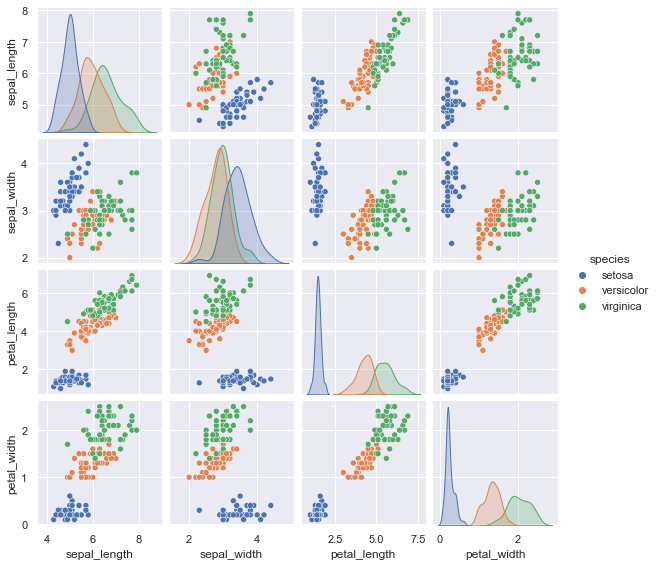

In [16]:
# Run but do not modify this code
sns.pairplot(iris, height=2, hue="species")

We want to build a predictive model for classifying the `species` of a flower given measurements of its `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`. To do so, we first use a `StandardScalar` to scale the numerical features, then split the data into training and testing sets.

In [17]:
# Run but do not modify this code

from sklearn.preprocessing import StandardScaler
data = iris.iloc[:,:4].values
data = StandardScaler().fit_transform(data)
target = iris["species"].values
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)

Use a k-nearest neighbors classifier for your model that predicts `species` given the four numerical features. We import the relevant `KNeighborsClassifier` for you below. Recall that an important hyperparameter of a k-nearest neighbor model is k, or the `n_neighbors` parameter to the `KNeighborsClassifier()` constructor. 

Use 5-fold cross validation to search for the best value of `n_neighbors` in validation on the training set from among possible values between 1 and 30. You can either do so using `cross_validate` to check each possible setting directly, or you can use a `GridSearchCV` to perform the search automatically during fitting. If you search manually, take the average of the five scores for 5-fold cross validation, for each value. If you use `GridSearchCV`, note that the `GridSearchCV` object can itself fit and predict, and that you can get the optimal setting after fitting with `.best_params_`. Report the optimal value of `n_neighbors`.

When you have fit your model with the optimal `n_neighbors` value on the training data, make predictions for the test data. Compute and report the `accuracy_score` of your model in testing.  

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Write your code for question 7 here
paramtry={'n_neighbors':range(1,30)}
knn_search=GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=paramtry)
knn_search.fit(train_data,train_target)
print(knn_search.best_params_)
knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X=train_data,y=train_target)
testing=knn_model.predict(test_data)
print(accuracy_score(test_target,testing))



{'n_neighbors': 10}
0.9555555555555556


### Answer 7
Write your answer here if not printed above.